In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np
import pandas as pd

In [4]:
mg = pd.read_csv('C:/Users/91976/Desktop/MissingMigrants-Global-2019-12-31_correct.csv')

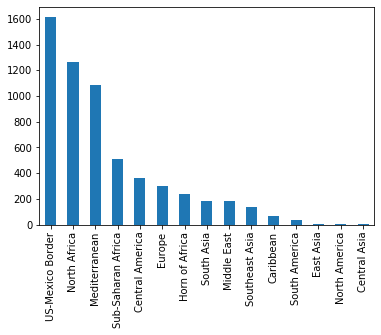

In [5]:
mg['Region of Incident'].value_counts().plot.bar()

In [6]:
pd.pivot_table(mg,values='Total Dead and Missing',index='Reported Date',aggfunc=np.sum).sort_index().head()

,Total Dead and Missing
Reported Date,
"April 01, 2015",5
"April 01, 2016",10
"April 01, 2017",1
"April 01, 2018",19
"April 01, 2019",52


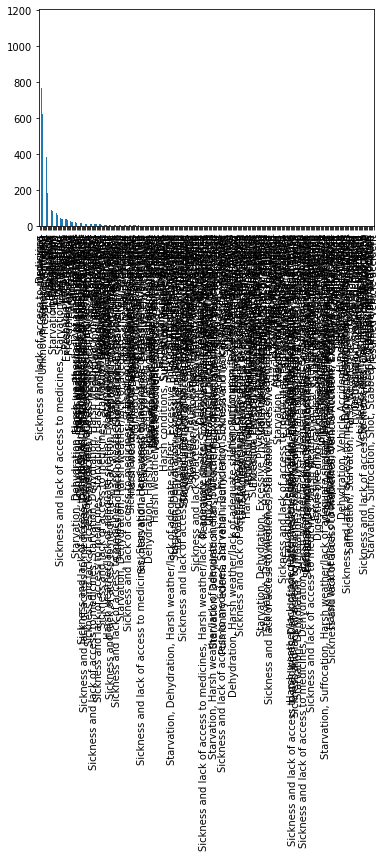

In [31]:
mg['Cause of Death'].value_counts().plot.bar()

In [30]:
pd.pivot_table(mg,values='Cause of Death',index='Reported Date',aggfunc=np.sum).sort_index().head()

,Cause of Death
Reported Date,
"April 01, 2015",DehydrationSickness and lack of access to medi...
"April 01, 2016","Vehicle Accident, Crushed in back of truckUnkn..."
"April 01, 2017","Crushed in back of truck, Vehicle Accident"
"April 01, 2018",DrowningPresumed drowningPresumed drowningUnkn...
"April 01, 2019",Presumed drowningHypothermiaUnknown (skeletal ...


In [8]:
date_s = mg.iloc[1,2]
date_s

'December 30, 2019'

In [9]:
date_test = datetime.strptime(date_s,'%B %d, %Y')
print(date_test)


2019-12-30 00:00:00


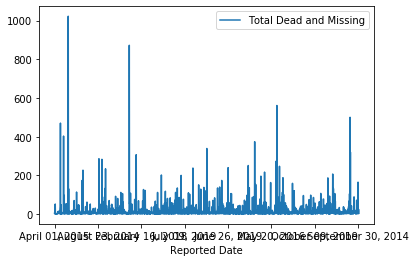

In [11]:
pd.pivot_table(mg,values='Total Dead and Missing',index='Reported Date',aggfunc=np.sum).sort_index().plot()

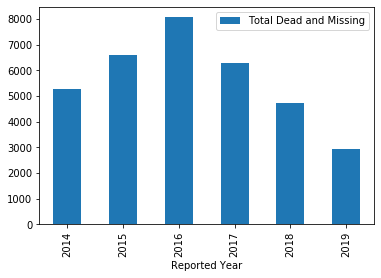

In [12]:
pd.pivot_table(mg,values='Total Dead and Missing',index='Reported Year',aggfunc=np.sum).sort_index().plot(kind='bar')

In [13]:
pd.pivot_table(mg,values='Total Dead and Missing',index='Reported Year',aggfunc=np.sum).sort_index()

,Total Dead and Missing
Reported Year,
2014,5287
2015,6584
2016,8070
2017,6279
2018,4734
2019,2958


In [15]:
print('Maximum date is : {}'.format(mg['Reported Date'].max()))
# last reported date was end of 1st Quarted 2019
print('Minimum date is : {}'.format(mg['Reported Date'].min()))

Maximum date is : September 30, 2019
Minimum date is : April 01, 2015


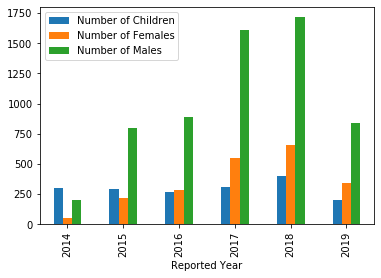

In [16]:

pd.pivot_table(mg,values=['Number of Males','Number of Females','Number of Children'],
               index='Reported Year',
               aggfunc={'Number of Males': np.sum,'Number of Females': np.sum,'Number of Children': np.sum}).plot(kind='bar')

In [17]:
# Create a column that sum Total Male and Female
mg['Total MFC']= mg['Number of Males']+mg['Number of Females']+mg['Number of Children']

In [18]:
mg[mg['Total MFC']==mg['Total Dead and Missing']].shape[0]

45

In [19]:
mg_reportMFC = mg[mg['Total MFC']==mg['Total Dead and Missing']]

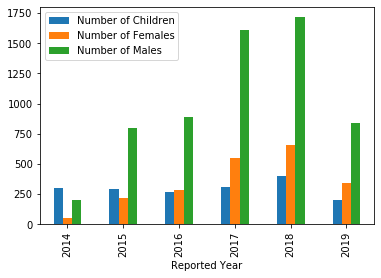

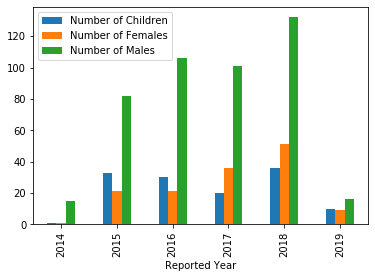

In [20]:
datasets=[mg,mg_reportMFC]

for data in datasets:
    pd.pivot_table(data,values=['Number of Males','Number of Females','Number of Children'],
                   index='Reported Year',
                   aggfunc={'Number of Males': np.sum,'Number of Females': np.sum,'Number of Children': np.sum}).plot(kind='bar')

In [21]:
pd.pivot_table(mg,values=['Number of Males','Number of Females','Number of Children'],
               index='Reported Year',
               aggfunc={'Number of Males': np.sum,'Number of Females': np.sum,'Number of Children': np.sum})

,Number of Children,Number of Females,Number of Males
Reported Year,,,
2014,300.0,54.0,202.0
2015,291.0,216.0,797.0
2016,268.0,282.0,890.0
2017,308.0,546.0,1614.0
2018,397.0,655.0,1715.0
2019,203.0,347.0,838.0


In [22]:
tidy =pd.pivot_table(mg_reportMFC,values=['Number of Males','Number of Females','Number of Children'],
               index='Reported Year',
               aggfunc={'Number of Males': np.sum,'Number of Females': np.sum,'Number of Children': np.sum})

tidy['year']=tidy.index
pd.melt(tidy,id_vars=['year'])

,year,variable,value
0,2014,Number of Children,1.0
1,2015,Number of Children,33.0
2,2016,Number of Children,30.0
3,2017,Number of Children,20.0
4,2018,Number of Children,36.0
5,2019,Number of Children,10.0
6,2014,Number of Females,1.0
7,2015,Number of Females,21.0
8,2016,Number of Females,21.0
9,2017,Number of Females,36.0


In [23]:
# split on ',' coma and expand then rename columns
lat_lon = mg['Location Coordinates'].str.split(',',expand=True).rename(index=int, columns={0: "lat", 1: "lon"})

In [24]:
#Concat expanded columns
mg =pd.concat([mg,lat_lon],axis=1)

In [25]:
mg.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,...,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality,Total MFC,lat,lon
0,52673,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,11.0,NaN,...,Unspecififed location off the coast of Algeria,El Watan,"35.568972356329, -1.289773129748",Western Mediterranean,https://bit.ly/2FqQHo4,Uncategorized,1,NaN,35.568972356329,-1.289773129748
1,52666,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,NaN,NaN,...,"Recoverd on Calamorcarro Beach, Ceuta",El Foro de Ceuta,"35.912383552874, -5.357673338898",Western Mediterranean,https://bit.ly/39yKRyF,Uncategorized,1,NaN,35.912383552874,-5.357673338898
2,52663,East Asia,"December 27, 2019",2019,Dec,5.0,NaN,5,NaN,NaN,...,"Bodies found on boat near Sado Island, Niigata...","Japan Times, Kyodo News, AFP","38.154018233313, 138.086032653130",NaN,"http://bit.ly/2sCnBz1, http://bit.ly/2sEra83, ...",Eastern Asia,3,NaN,38.154018233313,138.086032653130
3,52662,Middle East,"December 26, 2019",2019,Dec,7.0,NaN,7,64.0,NaN,...,"Van lake near Adilcevaz, Bitlis, Turkey","EFE, BBC, ARYnews","38.777228612085, 42.739257582031",NaN,"http://bit.ly/2ZG2Y19, http://bit.ly/2MLamDf, ...",Western Asia,3,NaN,38.777228612085,42.739257582031
4,52661,Middle East,"December 24, 2019",2019,Dec,12.0,NaN,12,NaN,NaN,...,"Al-Raqw market in Saada, Yemen","UN Humanitarian Coordinator in Yemen, Qatar Tr...","17.245364805636, 43.239093360326",NaN,"http://bit.ly/2FjolvD, http://bit.ly/2sD42GR, ...",Western Asia,4,NaN,17.245364805636,43.239093360326


In [26]:
import folium

In [27]:
mg['lat'] = mg['lat'].astype(float)
mg['lon'] = mg['lon'].astype(float)

In [28]:
max_lat =mg['lat'].max()
max_lon =mg['lon'].max()

In [29]:
m = folium.Map([max_lat, max_lon], zoom_start=3)

for point in mg.loc[:,['lat','lon']].dropna().sample(frac=1).values.tolist()[:3000]:
    folium.Circle(
        radius=100,
        location=point,
        color='blue',
        fill=True,
    ).add_to(m)
    
m 

In [32]:
mg[mg['Region of Incident'] == 'Mediterranean'].groupby(['Cause of Death'])['Total Dead and Missing'].sum().sort_values(ascending=False)[:15]

Cause of Death
Drowning                                    14739
Presumed drowning                            2892
Unknown                                       819
Suffocation                                   106
Presumed drowning, Hypothermia                 83
Asphyxiation                                   69
Hypothermia                                    68
Crushed, Asphyxiation                          45
Asphyxiation, Drowning                         33
Violence, Asphyxiation, Drowning               29
Dehydration, Starvation                        28
Presumed asphyxiation                          26
Burned, Drowning                               25
Sickness and lack of access to medicines       24
Shot                                           20
Name: Total Dead and Missing, dtype: int64

In [33]:
migrants = mg

In [34]:
# Convert string month into numerical one
migrants['Reported Month(Number)'] = pd.to_datetime(migrants['Reported Month'], format='%b').apply(lambda x: x.month)

migrants[migrants['Reported Year'] == 2014]['Reported Month(Number)'].min(), migrants[migrants['Reported Year'] == 2019]['Reported Month(Number)'].max()

(1, 12)

In [35]:
migrants.loc[:, 'Minimum Estimated Number of Missing'].sum(), migrants.loc[:, 'Number of Survivors'].sum(), 

(15423.0, 51410.0)

1767.0


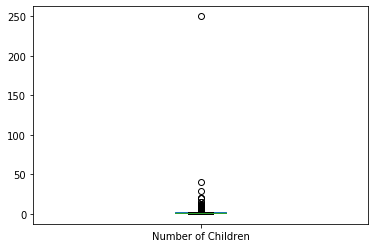

In [36]:
print(migrants.loc[:, 'Number of Children'].sum())
migrants.loc[:, 'Number of Children'].plot.box()

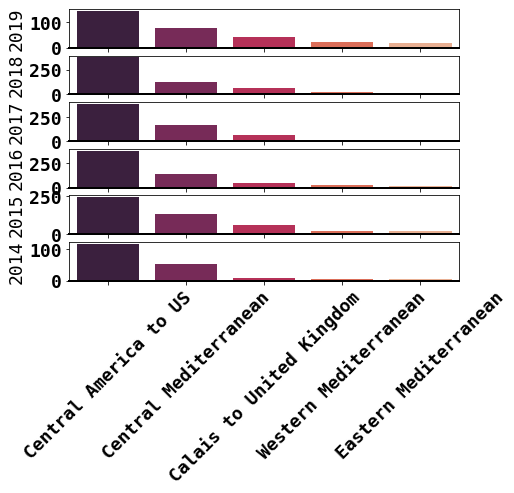

In [38]:
import matplotlib as mpl

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 18}

lines = {'linewidth' : 2}

mpl.rc('font', **font)
mpl.rc('lines', **lines)

f, axes = plt.subplots(6, 1, figsize=(7, 5), sharex=True)

for year, ax in zip(migrants['Reported Year'].unique(), axes):
    sns.barplot(x=list(pd.DataFrame(migrants[migrants['Reported Year'] == year]['Migration Route'].value_counts())[:5].index),  y='Migration Route',
                palette="rocket", ax=ax, data = pd.DataFrame(migrants[migrants['Reported Year'] == year]['Migration Route'].value_counts())[:5])
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(year)

plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 22})
plt.show()

del font, lines, f, axes

In [39]:
def years_value_counts(df, col):    
    
    # Store whole value_counts series with their particular year into list
    stats_of_years = [pd.DataFrame(df[df['Reported Year'] == year][col].value_counts()) for year in df['Reported Year'].unique()]
    
    # concat dfs with their corresponding column
    stats_of_years         =  pd.concat(stats_of_years, axis=1)
    stats_of_years.columns = df['Reported Year'].unique()
    stats_of_years.fillna(0, inplace=True)
    return stats_of_years

In [40]:
route_year   = years_value_counts(migrants, 'Migration Route')
UNSD_year    = years_value_counts(migrants, 'UNSD Geographical Grouping')
region_year  = years_value_counts(migrants, 'Region of Incident')

In [45]:
import plotly.graph_objs as go
import plotly            as py
from plotly.offline      import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Bar(name = str(col), x = region_year.transpose().index, y = region_year.transpose()[col]) 
                      for col in region_year.transpose().columns],
                
                layout = dict(
                    xaxis = dict(
                        title = dict(text = 'Number of incidents on specific region by year', font = dict(size=18))),
                    barmode = 'stack'))

iplot(fig)

In [47]:
import folium
from folium.plugins import HeatMapWithTime


migrants['Location Coordinates'].fillna('0, 0', inplace = True) # initialize missing value into 0, 0  location
migrants['lat'] = migrants['Location Coordinates'].apply(lambda x: float(str(x).split(', ')[0]))
migrants['lon'] = migrants['Location Coordinates'].apply(lambda x: float(str(x).split(', ')[1]))

basemap = folium.folium.Map(location = [migrants['lat'].median(), migrants['lon'].median()], zoom_start = 2)

indexes = ['{}/{}'.format(month, year) for year in migrants['Reported Year'].unique()[::-1] for month in range(1, 13)]

heat_data = [[[row['lat'], row['lon'], row['Total Dead and Missing']] for _, row in migrants[migrants['Reported Year'] == year][migrants['Reported Month(Number)'] == month].iterrows()]
             for year in migrants['Reported Year'].unique()[::-1] for month in range(1, 13)]

HeatMapWithTime(heat_data, auto_play = True, index = indexes, display_index = indexes).add_to(basemap)
basemap.save('Animated heatmap of migrants death or missing from 2014 to 2019 by month.mp4')
basemap

C:\Users\91976\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [48]:
migrants

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,...,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality,Total MFC,lat,lon,Reported Month(Number)
0,52673,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,11.0,NaN,...,El Watan,"35.568972356329, -1.289773129748",Western Mediterranean,https://bit.ly/2FqQHo4,Uncategorized,1,NaN,35.568972,-1.289773,12
1,52666,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,NaN,NaN,...,El Foro de Ceuta,"35.912383552874, -5.357673338898",Western Mediterranean,https://bit.ly/39yKRyF,Uncategorized,1,NaN,35.912384,-5.357673,12
2,52663,East Asia,"December 27, 2019",2019,Dec,5.0,NaN,5,NaN,NaN,...,"Japan Times, Kyodo News, AFP","38.154018233313, 138.086032653130",NaN,"http://bit.ly/2sCnBz1, http://bit.ly/2sEra83, ...",Eastern Asia,3,NaN,38.154018,138.086033,12
3,52662,Middle East,"December 26, 2019",2019,Dec,7.0,NaN,7,64.0,NaN,...,"EFE, BBC, ARYnews","38.777228612085, 42.739257582031",NaN,"http://bit.ly/2ZG2Y19, http://bit.ly/2MLamDf, ...",Western Asia,3,NaN,38.777229,42.739258,12
4,52661,Middle East,"December 24, 2019",2019,Dec,12.0,NaN,12,NaN,NaN,...,"UN Humanitarian Coordinator in Yemen, Qatar Tr...","17.245364805636, 43.239093360326",NaN,"http://bit.ly/2FjolvD, http://bit.ly/2sD42GR, ...",Western Asia,4,NaN,17.245365,43.239093,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,39207,US-Mexico Border,"January 16, 2014",2014,Jan,1.0,NaN,1,NaN,NaN,...,Ministry of Foreign Affairs Mexico,"31.344700000000, -109.545000000000",Central America to US,http://bit.ly/1qfIw00,Northern America,5,NaN,31.344700,-109.545000,1
5983,39368,Europe,"January 16, 2014",2014,Jan,1.0,0.0,1,2.0,NaN,...,EUBusiness (Agence France-Presse),"59.155100000000, 27.858600000000",NaN,http://bit.ly/1rTFTjR,Northern Europe,1,NaN,59.155100,27.858600,1
5984,39257,US-Mexico Border,"January 14, 2014",2014,Jan,1.0,NaN,1,NaN,NaN,...,Pima County Office of the Medical Examiner,"32.058118300000, -111.623576100000",Central America to US,NaN,Northern America,5,NaN,32.058118,-111.623576,1
5985,39256,US-Mexico Border,"January 12, 2014",2014,Jan,1.0,NaN,1,NaN,NaN,...,Pima County Office of the Medical Examiner,"32.058118300000, -111.623576100000",Central America to US,NaN,Northern America,5,NaN,32.058118,-111.623576,1
